In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ECG_Hilbert_Features.csv"  
df = pd.read_csv(file_path)

print("Dataset Preview:")
print(df.head())

print("\nSummary:")
print(df.info())


Dataset Preview:
   ecg_id  peak_amplitude_mean  peak_amplitude_max  peak_amplitude_std  \
0       1             0.647358            0.690444            0.033345   
1       2             0.654835            0.772856            0.058264   
2       3             0.833915            0.870122            0.034755   
3       4             0.656195            0.680036            0.018052   
4       5             0.471281            0.511736            0.019290   

   mean_amplitude_mean  mean_amplitude_max  mean_amplitude_std  \
0             0.101978            0.141135            0.018233   
1             0.153352            0.176487            0.017505   
2             0.118025            0.126937            0.006781   
3             0.147563            0.163980            0.008008   
4             0.088192            0.094065            0.004519   

   std_amplitude_mean  std_amplitude_max  std_amplitude_std  \
0            0.096241           0.104166           0.006757   
1            0.

In [2]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicates:")
print(df.duplicated().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns



Missing Values:
ecg_id                 0
peak_amplitude_mean    8
peak_amplitude_max     8
peak_amplitude_std     0
mean_amplitude_mean    0
mean_amplitude_max     0
mean_amplitude_std     0
std_amplitude_mean     0
std_amplitude_max      0
std_amplitude_std      0
qrs_amplitude_mean     0
qrs_amplitude_max      0
qrs_amplitude_std      0
Phase Locking Value    0
Phase Duration         0
dtype: int64

Duplicates:
0


In [3]:
print("\nSummary Statistics:")
print(df.describe().T)



Summary Statistics:
                       count          mean          std       min  \
ecg_id               20773.0  10849.125259  6277.991093  1.000000   
peak_amplitude_mean  20765.0      0.814640     0.386038  0.122876   
peak_amplitude_max   20765.0      0.907620     0.840034  0.142372   
peak_amplitude_std   20773.0      0.053413     0.254250  0.000000   
mean_amplitude_mean  20773.0      0.135449     0.083000  0.031116   
mean_amplitude_max   20773.0      0.172842     0.213218  0.038894   
mean_amplitude_std   20773.0      0.018556     0.066544  0.000000   
std_amplitude_mean   20773.0      0.137774     0.068383  0.019388   
std_amplitude_max    20773.0      0.156940     0.121269  0.022310   
std_amplitude_std    20773.0      0.011076     0.036713  0.000000   
qrs_amplitude_mean   20773.0      0.260367     0.141222  0.040451   
qrs_amplitude_max    20773.0      0.304800     0.235298  0.049089   
qrs_amplitude_std    20773.0      0.027106     0.079515  0.000000   
Phase Locking

<Figure size 1500x1000 with 0 Axes>

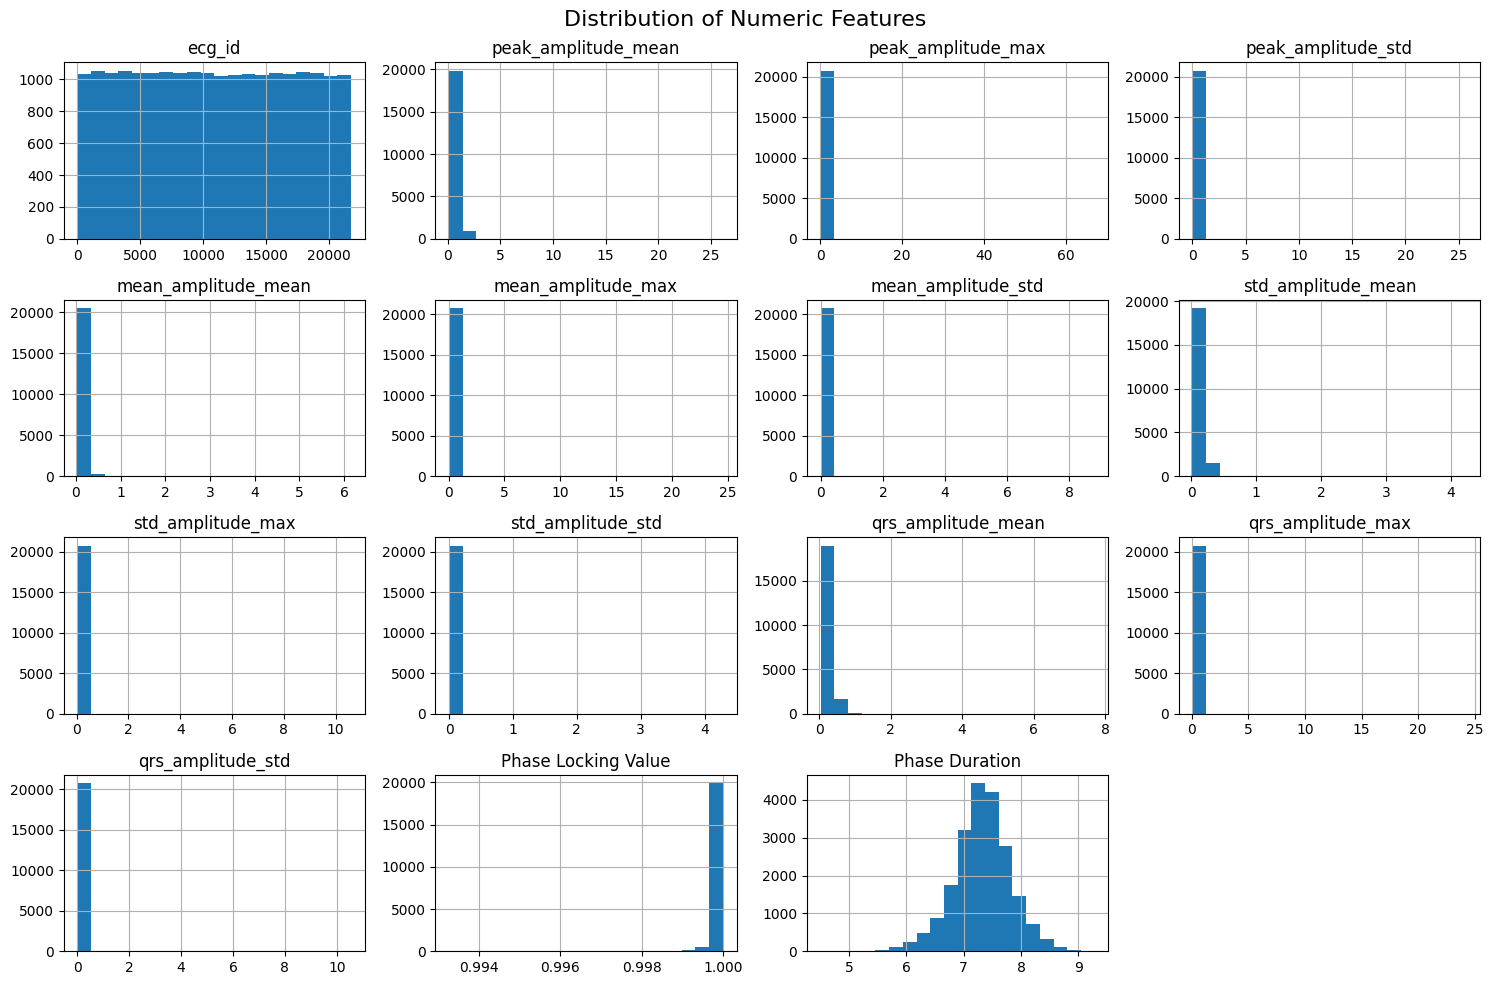

C:\Users\Rishi\AppData\Local\Temp\ipykernel_15928\1951297678.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y=col, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_15928\1951297678.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y=col, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_15928\1951297678.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y=col, palette='muted')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_15928\1951297678.py:18: FutureWarning: 

Passing `pal

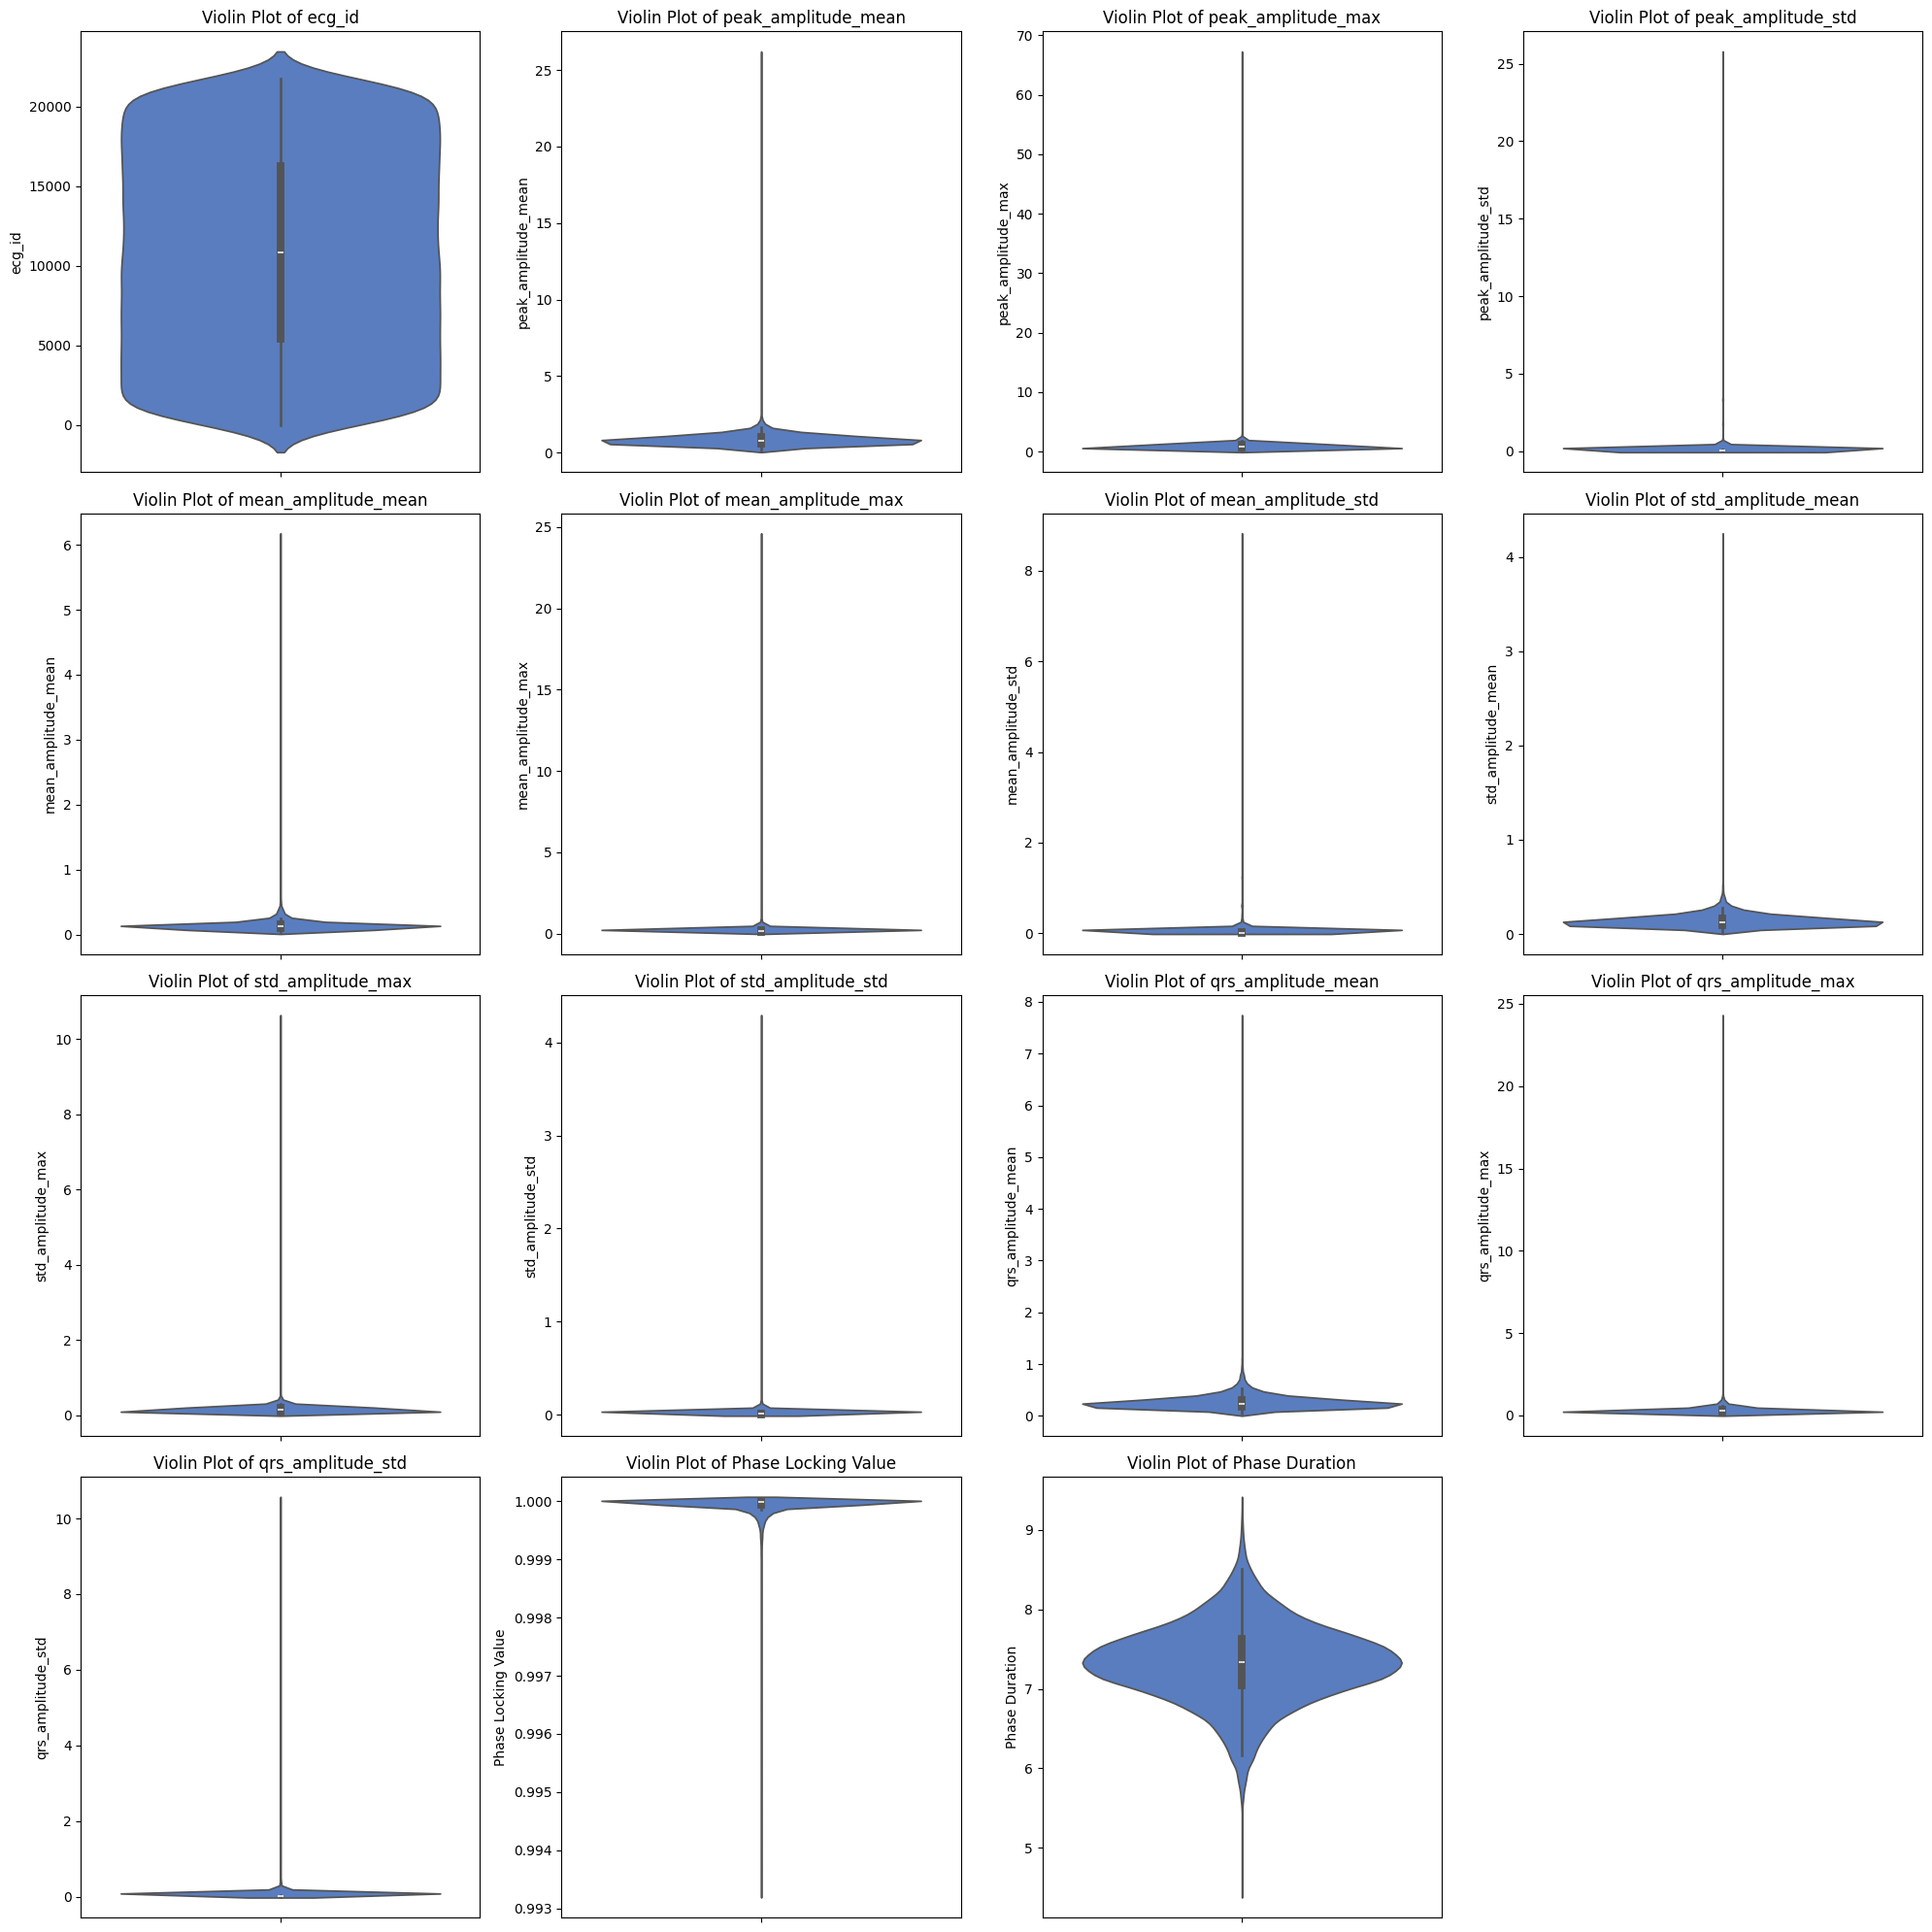

In [7]:
# Histograms
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

import math

num_plots = len(numeric_cols) 
cols = 4  
rows = math.ceil(num_plots / cols)  

# violin plots
plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(numeric_cols, 1): 
    plt.subplot(rows, cols, i)  
    sns.violinplot(data=df, y=col, palette='muted')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()


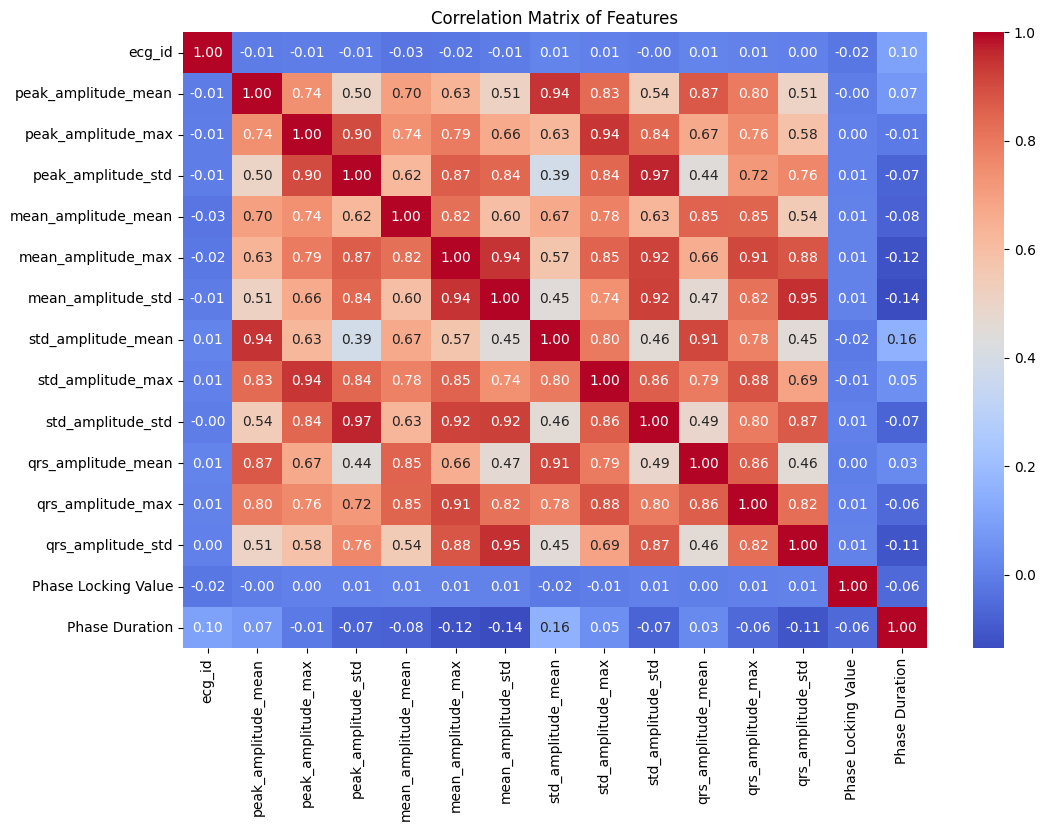

In [8]:
# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


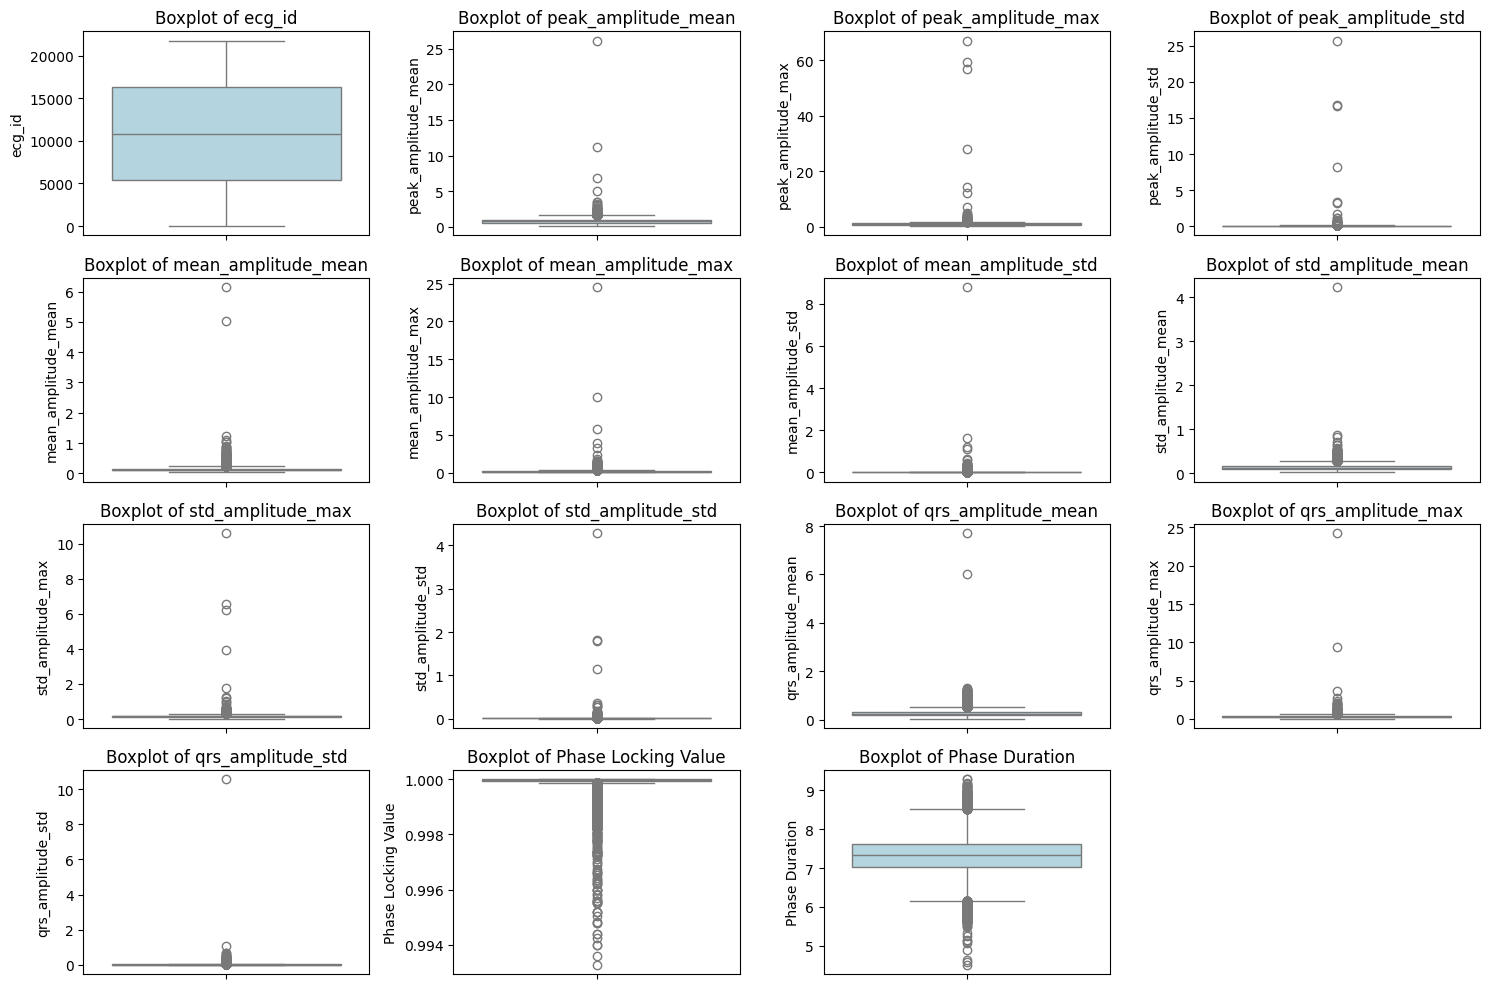

In [9]:
# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
